In [1]:
from sklearn.model_selection import train_test_split # функция, чтобы разбить данные на трейн и тест
from sklearn.linear_model import LogisticRegression # наша модель для классификации
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_breast_cancer # подгружаем датасет
breast_cancer = load_breast_cancer()

In [5]:
Y = breast_cancer.target ## Наша целевая переменная, 0 — если рака нет, 1 — если есть 
X = breast_cancer.data # X - признаки, по которым мы будем предсказывать рак 

In [9]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.3)
model = LogisticRegression()
model.fit(X_train, Y_train)

C:\Users\gorba\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Y_predicted = model.predict(X_val)
print(accuracy_score(Y_val,Y_predicted))
print(precision_score(Y_val,Y_predicted))
print(recall_score(Y_val,Y_predicted))
print(f1_score(Y_val,Y_predicted))

0.9298245614035088
0.9439252336448598
0.9439252336448598
0.9439252336448598


Загрузите встроенный в библиотеку sklearn датасет про ирисы с помощью функции load_iris. Обучите модель логистической регрессии (random_state=50, размер тестовой выборки 0.3) и укажите полученное значение метрики .
Ответ округлите до сотых.

In [15]:
from sklearn.datasets import load_iris
iris = load_iris()
# iris

In [20]:
Y = iris.target ## Наша целевая переменная, 0 — если рака нет, 1 — если есть 
X = iris.data

In [25]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.3, random_state=50)
model = LogisticRegression()
model.fit(X_train, Y_train)

C:\Users\gorba\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [26]:
Y_predicted = model.predict(X_val)
print(accuracy_score(Y_val,Y_predicted))

0.9777777777777777


In [34]:
df = pd.read_csv('train_mobile.xls', sep =';')

In [35]:
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            0  
1        1             1     0            1  
2        1             1     0            1  
3        1             0     0            1  
4        1             1     0            0  

[5 rows x 21 columns]

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

<AxesSubplot:>

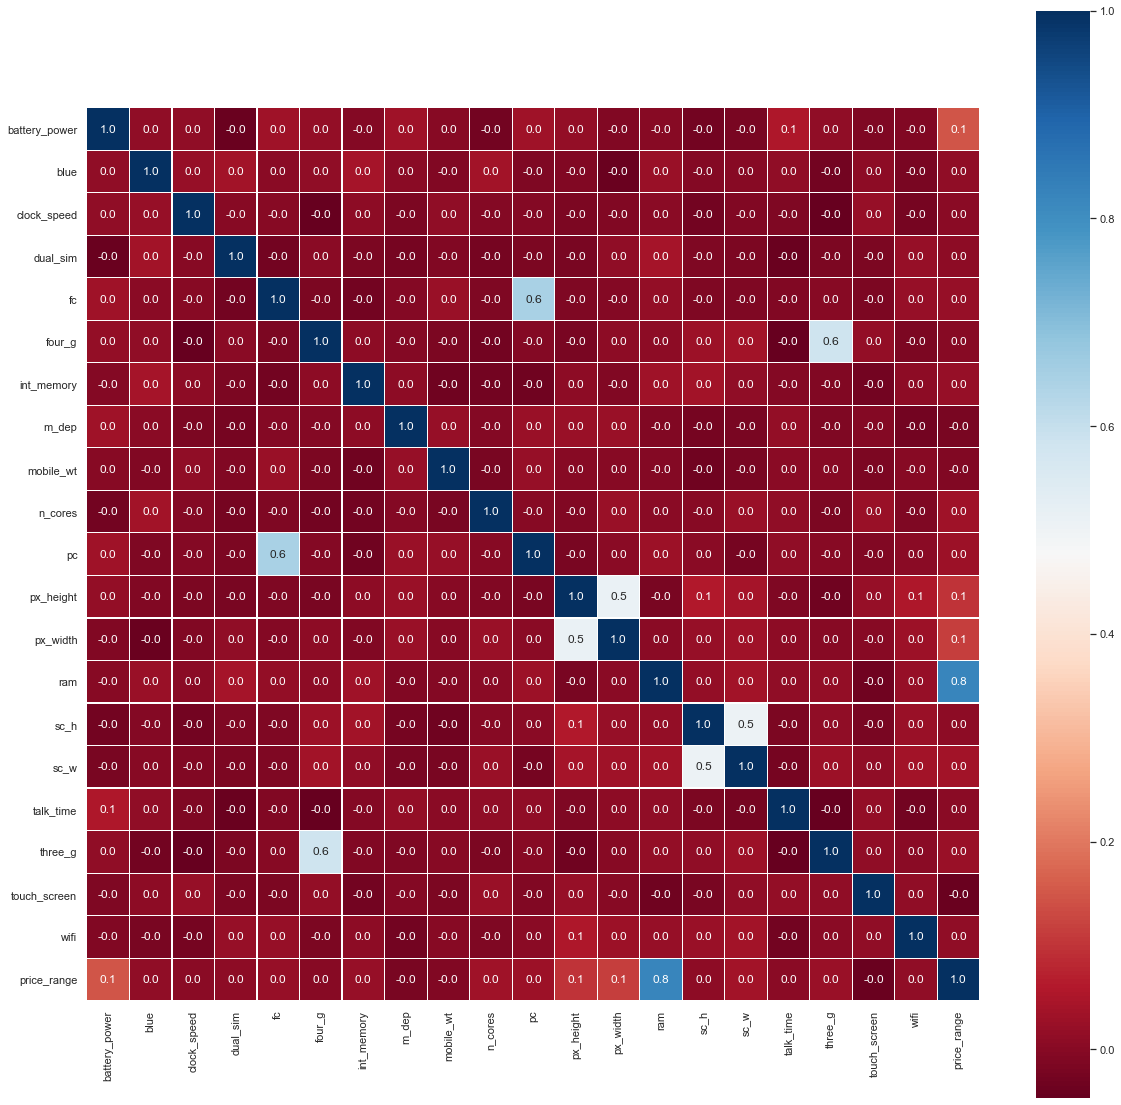

In [56]:
sns.set(font_scale=1)
plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), square=True,
              annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu")

Теперь необходимо обучить алгоритм.  Для начала разбейте выборку на тестовую и обучающую, размер тестовой задайте 0.2. Параметр random_state=31. В качестве модели возьмите логистическую регрессию. В качестве предикторов возьмите пять ранее отобранных признаков.

Рассчитайте метрику, которая покажет, какая доля телефонов, обозначенных классификатором как дорогие, действительно относится к этой категории. 

In [63]:
# X = df.drop(['price_range'], axis=1)
X = df[['battery_power', 'px_height', 'px_width', 'ram']]
Y = df['price_range']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=31)

In [69]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [3]:
Y_predicted = model.predict(X_test)
print(accuracy_score(y_test,Y_predicted))
print(precision_score(y_test,Y_predicted))
print(recall_score(y_test,Y_predicted))
print(f1_score(y_test,Y_predicted))

NameError: name 'model' is not defined

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.model_selection import KFold 
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) 
y = np.array([1, 2, 3, 4]) 
kf = KFold(n_splits=2)  #реализация разбиения
kf.get_n_splits(X) #возвращает количество разбиений
kf.split(X) #возвращает индексы для разбиения

<generator object _BaseKFold.split at 0x0000027BC6413BC8>

In [13]:
import pandas as pd

iris_data = pd.read_csv('iris.CSV', 
                        names=['sepal_length', 'sepal_width', 
                               'petal_length', 'petal_width', 'class'])

In [14]:
iris_data

sepal_length   sepal_width   petal_length   petal_width           class
Id   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
1              5.1           3.5            1.4           0.2     Iris-setosa
2              4.9           3.0            1.4           0.2     Iris-setosa
3              4.7           3.2            1.3           0.2     Iris-setosa
4              4.6           3.1            1.5           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
146            6.7           3.0            5.2           2.3  Iris-virginica
147            6.3           2.5            5.0           1.9  Iris-virginica
148            6.5           3.0            5.2           2.0  Iris-virginica
149            6.2           3.4            5.4           2.3  Iris-virginica
150            5.9           3.0            5.1           1.8  Iris-virginica

[151 rows x 5 columns]

In [19]:
iris_data = iris_data.drop(iris_data.index[[0]])

In [21]:
iris_data

sepal_length sepal_width petal_length petal_width           class
1            5.1         3.5          1.4         0.2     Iris-setosa
2            4.9         3.0          1.4         0.2     Iris-setosa
3            4.7         3.2          1.3         0.2     Iris-setosa
4            4.6         3.1          1.5         0.2     Iris-setosa
5            5.0         3.6          1.4         0.2     Iris-setosa
..           ...         ...          ...         ...             ...
146          6.7         3.0          5.2         2.3  Iris-virginica
147          6.3         2.5          5.0         1.9  Iris-virginica
148          6.5         3.0          5.2         2.0  Iris-virginica
149          6.2         3.4          5.4         2.3  Iris-virginica
150          5.9         3.0          5.1         1.8  Iris-virginica

[150 rows x 5 columns]

In [22]:
from sklearn.model_selection import train_test_split

train, valid = train_test_split(iris_data, test_size=0.15, shuffle=True)

print('Размер исходной выборки: {}\nРазмер тренировочной выборки: {}\nРазмер валидационной выборки: {}'
      .format(iris_data.shape, train.shape, valid.shape)
)

Размер исходной выборки: (150, 5)
Размер тренировочной выборки: (127, 5)
Размер валидационной выборки: (23, 5)


In [23]:
def visualize_train_valid_counts(init_data, train, valid):
    x = np.array([0, 1, 2])
    width = 0.2

    plt.figure(figsize=(15, 8))
    ax = plt.subplot(111)

    classes = list(init_data['class'].value_counts().index)

    ax.bar(x - width, list(init_data['class'].value_counts()[classes]), width, color='r', label='Исходные данные')
    ax.bar(x, list(train['class'].value_counts()[classes]), width, color='g', label='Тренировочная выборка')
    ax.bar(x, list(valid['class'].value_counts()[classes]), width, bottom=list(train['class'].value_counts()[classes]), color='b', label='Валидационная выборка')

    ax.set_ylim([0, 70])
    plt.xticks(x - width / 2, classes, fontsize=20)
    plt.yticks(fontsize=15)
    plt.ylabel('Кол-во примеров', fontsize=20)
    plt.minorticks_on()
    plt.grid(which='major', color='r')
    plt.grid(which='minor', linestyle=':', color='k')
    plt.legend(fontsize=15)

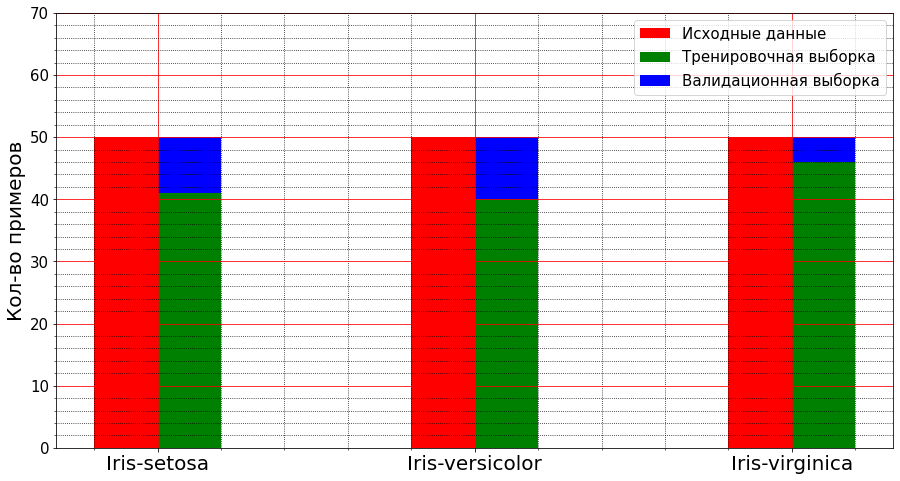

In [26]:
visualize_train_valid_counts(iris_data, train, valid)

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.15)
train_indices, valid_indices = [split for split in sss.split(iris_data.iloc[:, :4], iris_data.iloc[:, 4])][0]
s_train = iris_data.iloc[train_indices]
s_valid = iris_data.iloc[valid_indices]

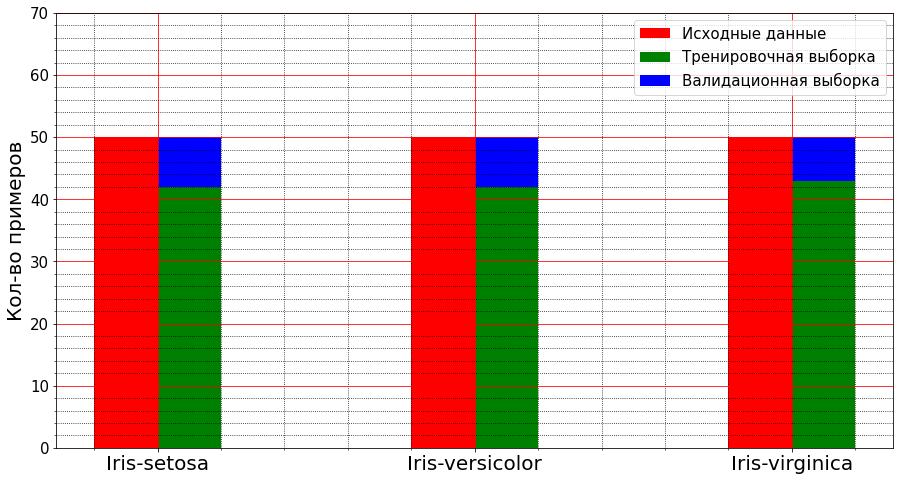

In [29]:
visualize_train_valid_counts(iris_data, s_train, s_valid)

In [30]:
valid_frac = 0.15
test_frac = 0.15

valid_count = int(valid_frac * iris_data.shape[0])
test_count = int(test_frac * iris_data.shape[0])

train, valid_test = train_test_split(iris_data, 
                                     test_size=(valid_count + test_count))
valid, test = train_test_split(valid_test, test_size=test_count)

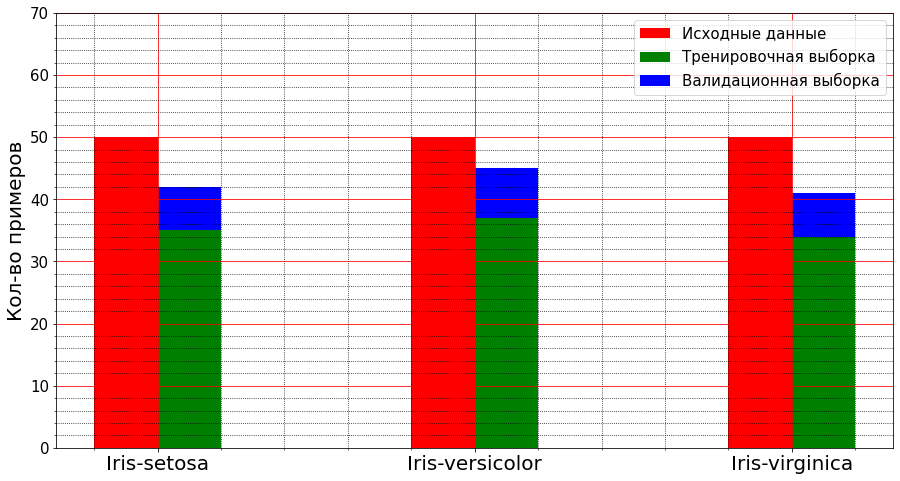

In [32]:
visualize_train_valid_counts(iris_data, train, valid)

Второй тип разбиения — k-fold, перекрёстная валидация. Сделаем k-fold разбиение данных, используя класс KFold:

In [34]:
from sklearn.model_selection import KFold

# shuffle=False исключает предварительное перемешивание примеров
kf = KFold(n_splits=3, shuffle=False)

for train_index, valid_index in kf.split(iris_data):
    print('train indices: {}\nvalid indices: {}'.format(train_index, valid_index))
    print('='*20)

train indices: [ 50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149]
valid indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
train indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 

In [36]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()

for train_index, valid_index in loo.split(iris_data[:5]):
    print('train indices: {}\nvalid indices: {}'.format(train_index, valid_index))
    print('='*20)

train indices: [1 2 3 4]
valid indices: [0]
train indices: [0 2 3 4]
valid indices: [1]
train indices: [0 1 3 4]
valid indices: [2]
train indices: [0 1 2 4]
valid indices: [3]
train indices: [0 1 2 3]
valid indices: [4]


Загрузите данные train.csv, разделите выборку на обучающую и тестовую части в соотношении 70% на 30% без перемешивания. Найдите среднее значение для признака payment_amount и запишите его в переменную result. Обратите внимание, что среднее нужно считать по тестовой выборке.

In [45]:
df =  pd.read_csv('train_ML.CSV', encoding = 'ISO-8859-1', low_memory = False)
df.head(2)

ticket_id                                     agency_name  \
0      22056  Buildings, Safety Engineering & Env Department   
1      27586  Buildings, Safety Engineering & Env Department   

     inspector_name                      violator_name  \
0   Sims, Martinzie  INVESTMENT INC., MIDWEST MORTGAGE   
1  Williams, Darrin           Michigan, Covenant House   

   violation_street_number violation_street_name  violation_zip_code  \
0                   2900.0                 TYLER                 NaN   
1                   4311.0               CENTRAL                 NaN   

   mailing_address_str_number mailing_address_str_name     city  ...  \
0                         3.0                S. WICKER  CHICAGO  ...   
1                      2959.0       Martin Luther King  Detroit  ...   

  clean_up_cost judgment_amount payment_amount balance_due  \
0           0.0           305.0            0.0       305.0   
1           0.0           855.0          780.0        75.0   

          payment_date      payment_status collection_status grafitti_status  \
0                  NaN  NO PAYMENT APPLIED               NaN             NaN   
1  2005-06-02 00:00:00        PAID IN FULL               NaN             NaN   

                          compliance_detail  compliance  
0               non-compliant by no payment         0.0  
1  compliant by late payment within 1 month         1.0  

[2 rows x 34 columns]

In [49]:
train, valid = train_test_split(df, test_size=0.3, shuffle=False)
result = train.payment_amount.mean()
result

55.22498030979261